### 1. 목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- Decision tree 시각화 & 과대적합 속성 제어
- 특성 중요도 확인하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mushroom.csv')

In [3]:
data.head(3)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [4]:
data.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.shape

(8124, 23)

In [7]:
# 문제, 답 분리
X = data.iloc[:, 1:]
#X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', '' ]]
y = data['poisonous']

In [8]:
# 문자로 되어있고, 컴퓨터 학습이 안된다. 왜냐면 숫자만 이해하니까! 그럼 숫자로 바꿔주자
X.shape, y.shape

((8124, 22), (8124,))

### 인코딩(encoding)
- Lable Encoding : 단순 수치 값으로 매핑하는 작업
- One-hot Encoding : 0과 1의 값을 가지고 새로운 특성을 만들어 데이터를 표시하는 방법
 => 범주현 변수를 표현하는데 널리 쓰이는 방법

In [9]:
# 원-핫 인코딩 시킨 문제 데이터
X_one_hot = pd.get_dummies(X)
X_one_hot.head(1)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


### 모델링

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#(문제, 정답, test 비율)
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3)

In [12]:
X_train.shape, y_train.shape

((5686, 117), (5686,))

In [13]:
X_test.shape, y_test.shape

((2438, 117), (2438,))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# 모델 생성
tree_model = DecisionTreeClassifier()

In [16]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
tree_model.score(X_train, y_train)

1.0

In [18]:
tree_model.score(X_test, y_test)

1.0

### 시각화 패키지 설치
- graphviz 패키지 이용

In [19]:
!pip install graphviz

In [20]:
from sklearn.tree import export_graphviz

In [21]:
# graphviz가 그래프 형태로 시각화 할 수 있는 파일을 만들어주는 역할
export_graphviz(tree_model, # 학습시킨 모델
                out_file='tree.dot', # 저장할 파일 이름 
                class_names=['독','식용'], #클래스 이름 
                feature_names=X_one_hot.columns, # 특성 이름
                impurity=False, # 불순도 출력 여부 
                filled=True # 색 다르게 표시할지 여부
               )

In [22]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\smhrd\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-TBJU6UK',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'base',
        'CONDA_EXE': 'C:\\Users\\smhrd\\anaconda3\\Scripts\\conda.exe',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'CONDA_PYTHON_EXE': 'C:\\Users\\smhrd\\anaconda3\\python.exe',
        'CONDA_SHLVL': '1',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\\smhrd',
        'LOCALAPPDATA': 'C:\\Users\\smhrd\\AppData\\Local',
        'LOGONSERVER': '\\\\DESKTOP-TBJU6UK',
        'NUMBER_OF_PROCESSORS': '8',
        'ONEDRIVE': 'C:\\Users\\smhrd\\OneDrive',
        'ONEDRIVE

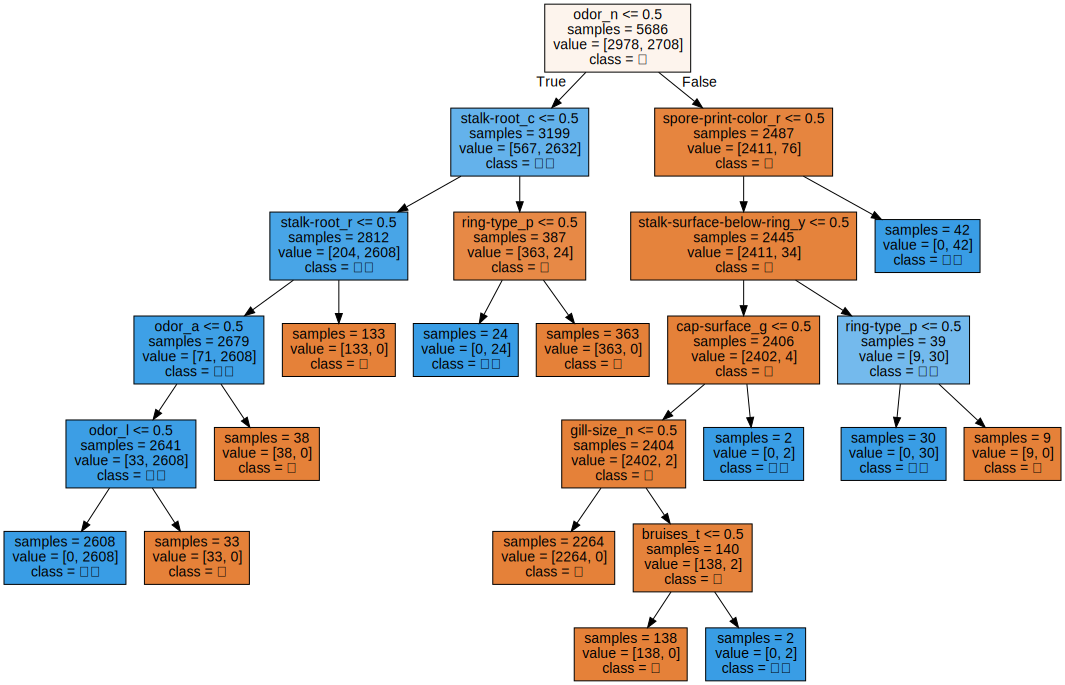

In [23]:
# 트리가 어떤 규칙을 만들었는지 시각화하는 기능
import graphviz

# export_graphviz로 만든 dot형식의 파일 열기
with open('tree.dot', encoding='UTF8') as f: # f라고 부르고
    dot_graph = f.read() # f라고 읽기
    
display(graphviz.Source(dot_graph)) # graphviz시각화 해줌

### 과대 적합제어

In [24]:
# max_depth, max_leaf_nodes, min_simples_leaf

In [28]:
# 1. 모델 생성2
tree_model2 = DecisionTreeClassifier(max_depth=1)

In [29]:
# 2. 모델 학습시키기
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

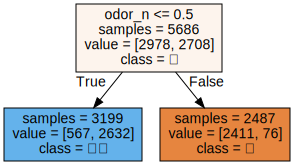

In [30]:
# graphviz가 그래프 형태로 시각화 할 수 있는 파일을 만들어주는 역할
export_graphviz(tree_model2, # 학습시킨 모델
                out_file='tree2.dot', # 저장할 파일 이름 
                class_names=['독','식용'], #클래스 이름 
                feature_names=X_one_hot.columns, # 특성 이름
                impurity=False, # 불순도 출력 여부 
                filled=True # 색 다르게 표시할지 여부
               )

with open('tree2.dot', encoding='UTF8') as f: # f라고 부르고
    dot_graph2 = f.read() # f라고 읽기
    
display(graphviz.Source(dot_graph2)) # graphviz시각화 해줌

In [31]:
tree_model2.score(X_train, y_train)

0.8869152303904326

In [32]:
tree_model2.score(X_test, y_test)

0.8863822805578343

In [33]:
# 모델 생성3
tree_model3 = DecisionTreeClassifier(max_depth=3)

In [34]:
tree_model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
tree_model3.score(X_test, y_test)

0.985233798195242

In [36]:
# max_depth
# 값이 작을수록 : 단순한 규칙 -> 과소적합
# 값이 클수록 :복잡한 규칙 ->

### 특성선택
- tree 모델의 특성 중요도 확인

In [37]:
# 특성 중요도 값
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40662852e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38999919e-03, 2.57567556e-02, 0.00000000e+00,
       0.00000000e+00, 2.29766457e-02, 0.00000000e+00, 6.19133610e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.89717510e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79646074e-01, 0.00000000e+00, 8.46666326e-02,
      

In [42]:
# 모델의 특성 중요도, 특성의 이름을 이용해 df 생성
importance_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['name'])

In [43]:
importance_df

,name
cap-shape_b,0.0
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [44]:
# 내림차순으로 정렬
importance_df.sort_values(by='name', ascending=False)

,name
odor_n,0.619134
stalk-root_c,0.179646
stalk-root_r,0.084667
spore-print-color_r,0.028309
odor_a,0.025757
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
